In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
dataset = pd.read_csv('mtcars.csv')


In [156]:
dataset.head()

,car_names,miles_per_gallon,cylinders,displacement,horsepower,rear_axle_ratio,weight,quarter_mile _time,engine_shape,transmission,gear,carburetors
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_names           32 non-null     object 
 1   miles_per_gallon    32 non-null     float64
 2   cylinders           32 non-null     int64  
 3   displacement        32 non-null     float64
 4   horsepower          32 non-null     int64  
 5   rear_axle_ratio     32 non-null     float64
 6   weight              32 non-null     float64
 7   quarter_mile _time  32 non-null     float64
 8   engine_shape        32 non-null     int64  
 9   transmission        32 non-null     int64  
 10  gear                32 non-null     int64  
 11  carburetors         32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [158]:
X = dataset.iloc[:, 2:]# All columns except car_names and miles_per_gallon
y = dataset.iloc[:, 1]  # Target variable 'miles_per_gallon'


In [159]:
print("Linear Regression with 80-20 Train-Test Split")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Linear Regression with 80-20 Train-Test Split


In [160]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("Linear Regression Coefficients:", linear_regressor.coef_)
print("Linear Regression Intercept:", linear_regressor.intercept_)


Linear Regression Coefficients: [ 1.71143672  0.01945528 -0.02081984  2.39798951 -4.47810898  1.04406112
  2.17748035  2.41149487  3.47766403 -1.10282305]
Linear Regression Intercept: -16.063699554753992


In [161]:
y_pred_linear = linear_regressor.predict(X_test)


In [162]:
print(f'\nLinear Regression - Variance score (R^2): {linear_regressor.score(X_test, y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))



Linear Regression - Variance score (R^2): -0.9510672951456858
MAE: 4.011278035115071
MSE: 23.18903206830499
RMSE: 4.815499150483259


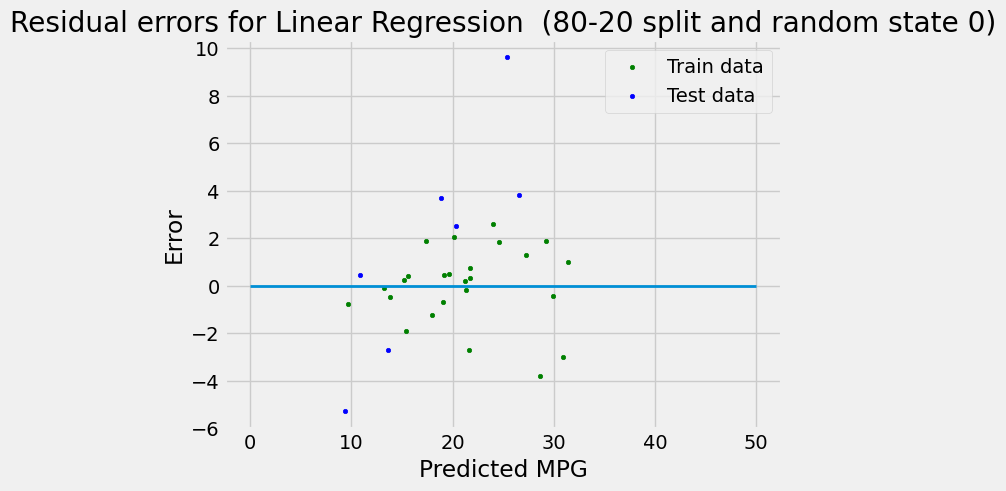

In [163]:
plt.style.use('fivethirtyeight')
plt.scatter(linear_regressor.predict(X_train), linear_regressor.predict(X_train) - y_train, color="green", s=10, label='Train data')
plt.scatter(linear_regressor.predict(X_test), linear_regressor.predict(X_test) - y_test, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors for Linear Regression  (80-20 split and random state 0)")
plt.xlabel("Predicted MPG")
plt.ylabel("Error")
plt.show()


In [164]:
print("Linear Regression with 60-40 Train-Test Split")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


Linear Regression with 60-40 Train-Test Split


In [165]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("Linear Regression Coefficients:", linear_regressor.coef_)
print("Linear Regression Intercept:", linear_regressor.intercept_)


Linear Regression Coefficients: [ 1.21023018  0.018894   -0.02138956  1.76120538 -4.74543822  0.94290041
  1.37054586  1.14223361  3.43097884 -0.88487385]
Linear Regression Intercept: -7.490886189566911


In [166]:
y_pred_linear = linear_regressor.predict(X_test)

print(f'\nLinear Regression - Variance score (R^2): {linear_regressor.score(X_test, y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))



Linear Regression - Variance score (R^2): 0.5762466056132449
MAE: 2.813275122864799
MSE: 12.702722610455412
RMSE: 3.5640879072289184


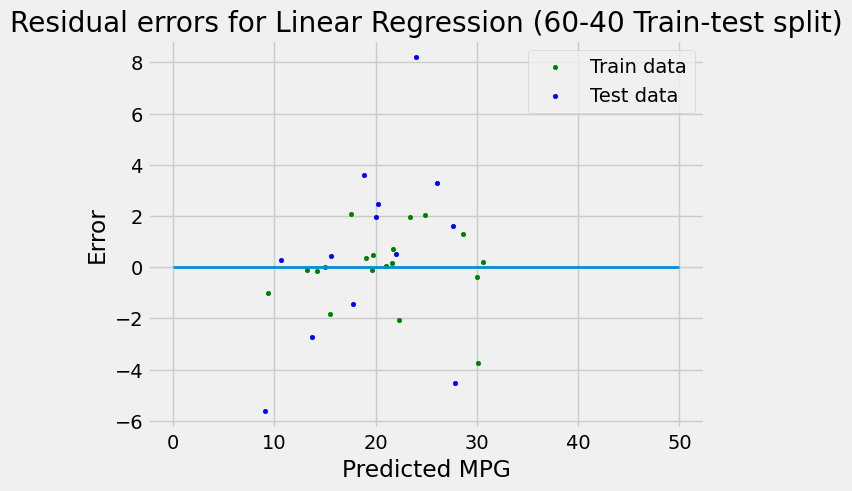

In [167]:
plt.style.use('fivethirtyeight')
plt.scatter(linear_regressor.predict(X_train), linear_regressor.predict(X_train) - y_train, color="green", s=10, label='Train data')
plt.scatter(linear_regressor.predict(X_test), linear_regressor.predict(X_test) - y_test, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors for Linear Regression (60-40 Train-test split)")
plt.xlabel("Predicted MPG")
plt.ylabel("Error")
plt.show()

In [168]:
print("Linear Regression with 80-20 Train-Test Split And Random_state=42")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression with 80-20 Train-Test Split And Random_state=42


In [169]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("Linear Regression Coefficients:", linear_regressor.coef_)
print("Linear Regression Intercept:", linear_regressor.intercept_)


Linear Regression Coefficients: [-0.4762499   0.01831107 -0.00950031  1.00213048 -4.86203707  1.84095198
 -1.93718579  1.07662425  1.32710759  0.14713125]
Linear Regression Intercept: -5.593700289851473


In [170]:
y_pred_linear = linear_regressor.predict(X_test)

print(f'\nLinear Regression - Variance score (R^2): {linear_regressor.score(X_test, y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))



Linear Regression - Variance score (R^2): 0.7466453084791007
MAE: 2.241072653667493
MSE: 10.13015466778727
RMSE: 3.1827903901745196


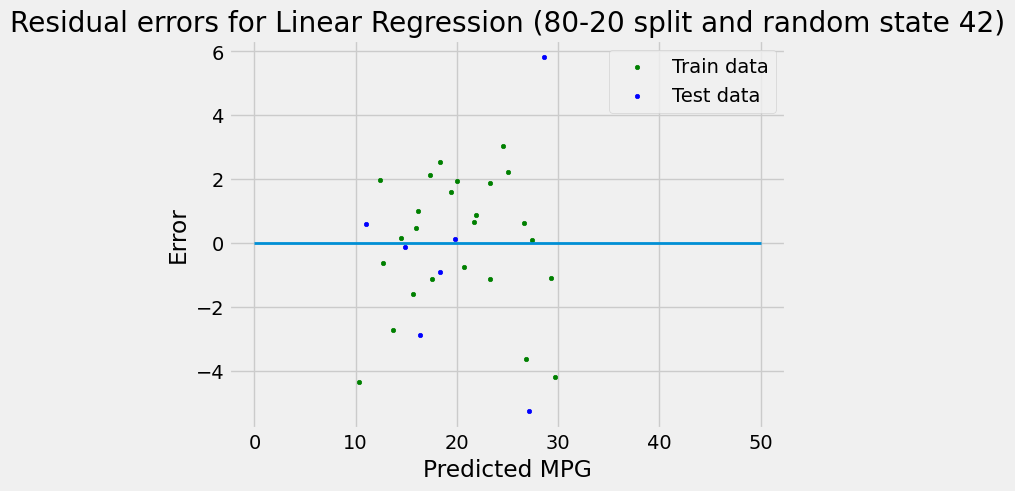

In [171]:
plt.style.use('fivethirtyeight')
plt.scatter(linear_regressor.predict(X_train), linear_regressor.predict(X_train) - y_train, color="green", s=10, label='Train data')
plt.scatter(linear_regressor.predict(X_test), linear_regressor.predict(X_test) - y_test, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors for Linear Regression (80-20 split and random state 42)")
plt.xlabel("Predicted MPG")
plt.ylabel("Error")
plt.show()


Polynomial Regression for Horsepower:

Degree 2 Polynomial Regression for Horsepower:
Coefficients: [ 0.         -0.24328718  0.00053405]
Intercept: 41.80586694408838
Polynomial Regression (Degree 2) - Variance score (R^2): 0.672889868391835
MAE: 3.2217005936224665
MSE: 13.079198205088757
RMSE: 3.616517413906472


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


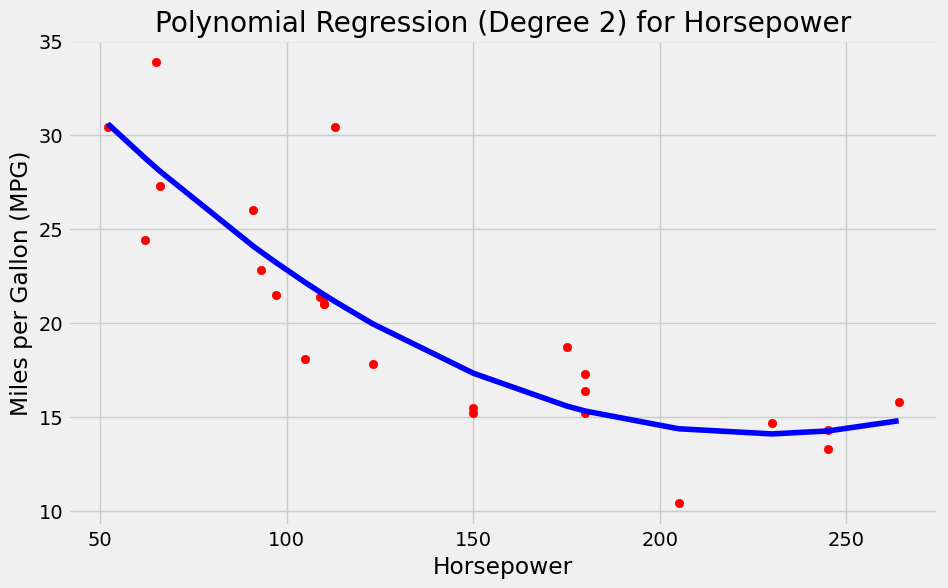


Degree 3 Polynomial Regression for Horsepower:
Coefficients: [ 0.00000000e+00 -1.98275667e-01  2.10538093e-04  6.96602364e-07]
Intercept: 39.96735658439759
Polynomial Regression (Degree 3) - Variance score (R^2): 0.5149789057927536
MAE: 3.720791021018525
MSE: 19.393123024341243
RMSE: 4.403762371466159


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


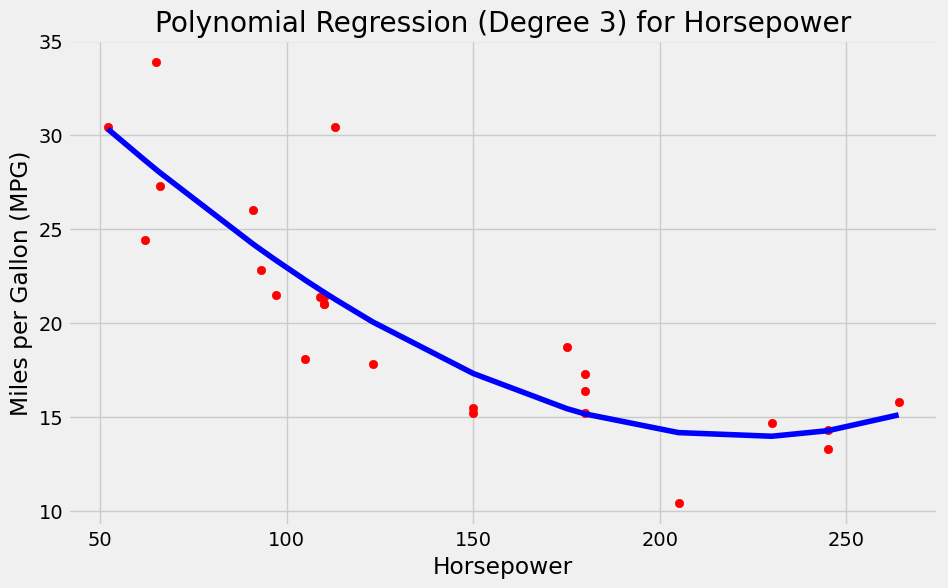


Degree 4 Polynomial Regression for Horsepower:
Coefficients: [ 0.00000000e+00 -4.10635494e-01  2.65686950e-03 -1.07182356e-05
  1.84935476e-08]
Intercept: 46.18331027592718
Polynomial Regression (Degree 4) - Variance score (R^2): -0.9121601709511657
MAE: 5.553361338210686
MSE: 76.45596837001924
RMSE: 8.743910359216821


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


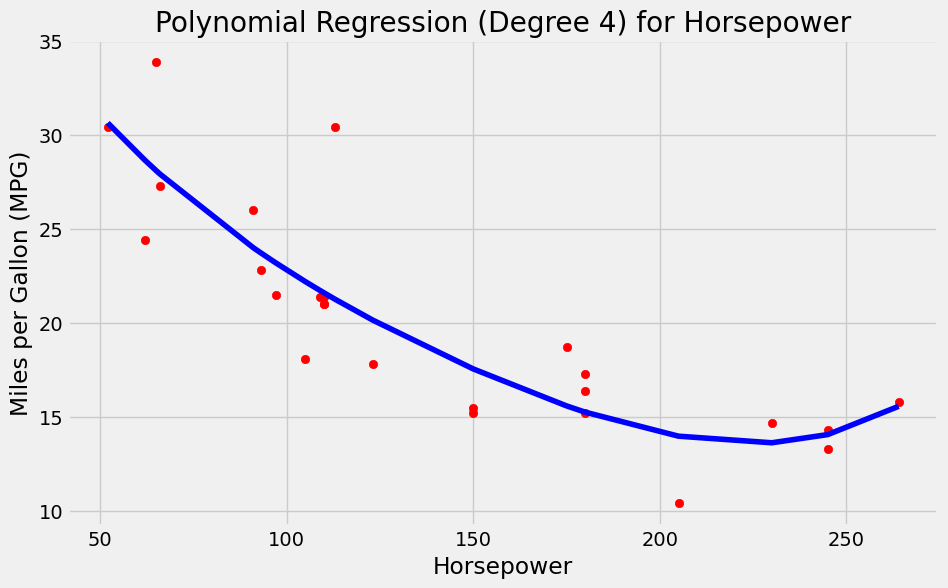

In [172]:
feature = 'horsepower'
print(f'\nPolynomial Regression for {feature.capitalize()}:')

X_poly = X[[feature]].values

for degree in [2, 3, 4]:
    print(f'\nDegree {degree} Polynomial Regression for {feature.capitalize()}:')

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train[[feature]])
    X_poly_test = poly.transform(X_test[[feature]])

    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly_train, y_train)

    print(f"Coefficients: {poly_regressor.coef_}")
    print(f"Intercept: {poly_regressor.intercept_}")

    y_pred_poly = poly_regressor.predict(X_poly_test)

    print(f'Polynomial Regression (Degree {degree}) - Variance score (R^2): {poly_regressor.score(X_poly_test, y_test)}')
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_poly))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_poly))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[feature], y_train, color='red')
    plt.plot(np.sort(X_train[feature]), poly_regressor.predict(poly.transform(np.sort(X_train[feature]).reshape(-1, 1))), color='blue')
    plt.title(f'Polynomial Regression (Degree {degree}) for {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Miles per Gallon (MPG)')
    plt.show()


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



Polynomial Regression for Rear_axle_ratio:

Degree 2 Polynomial Regression for Rear_axle_ratio:
Coefficients: [ 0.         -0.3540122   1.00390974]
Intercept: 8.138078564658066
Polynomial Regression (Degree 2) - Variance score (R^2): 0.46506212644350253
MAE: 3.673212461773692
MSE: 21.38899960468083
RMSE: 4.62482427824894


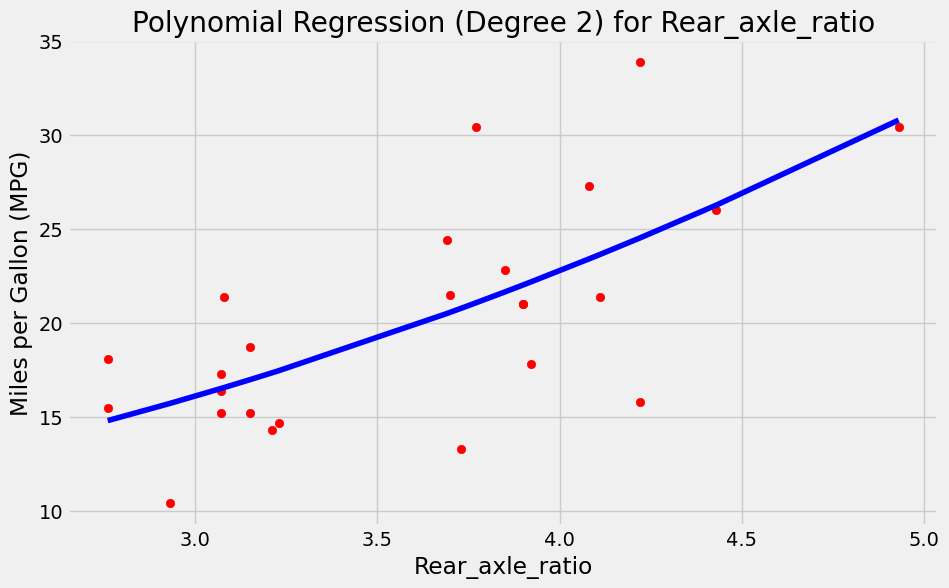


Degree 3 Polynomial Regression for Rear_axle_ratio:
Coefficients: [  0.         -75.45703443  20.91020894  -1.7280502 ]
Intercept: 100.85862140151357
Polynomial Regression (Degree 3) - Variance score (R^2): 0.4919478935945285
MAE: 3.564870171097572
MSE: 20.313996896157708
RMSE: 4.5071051569890965


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


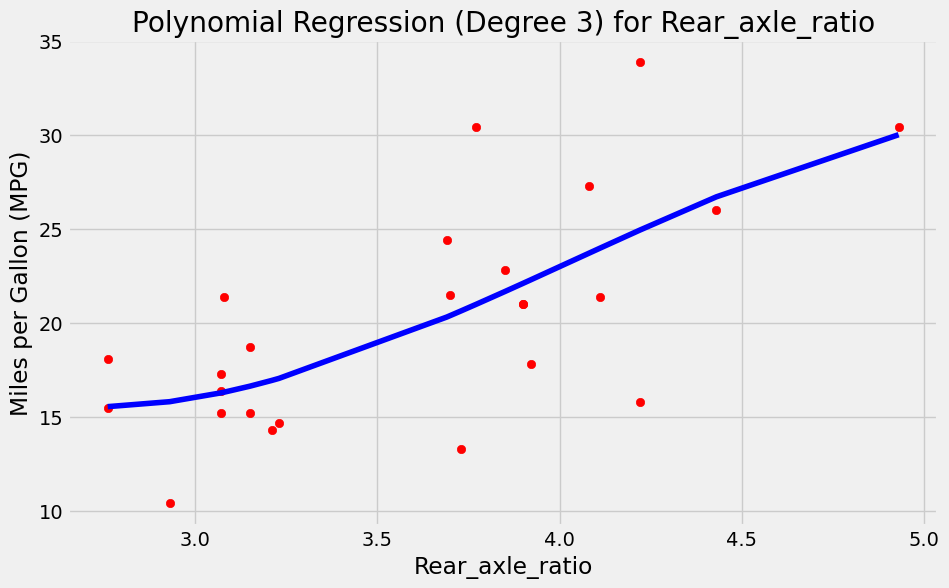

C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



Degree 4 Polynomial Regression for Rear_axle_ratio:
Coefficients: [   0.         -807.59076541  319.37276985  -55.07750242    3.52726138]
Intercept: 765.5053139314435
Polynomial Regression (Degree 4) - Variance score (R^2): 0.47538603014834757
MAE: 3.6884496633809087
MSE: 20.97620779617866
RMSE: 4.579979017002006


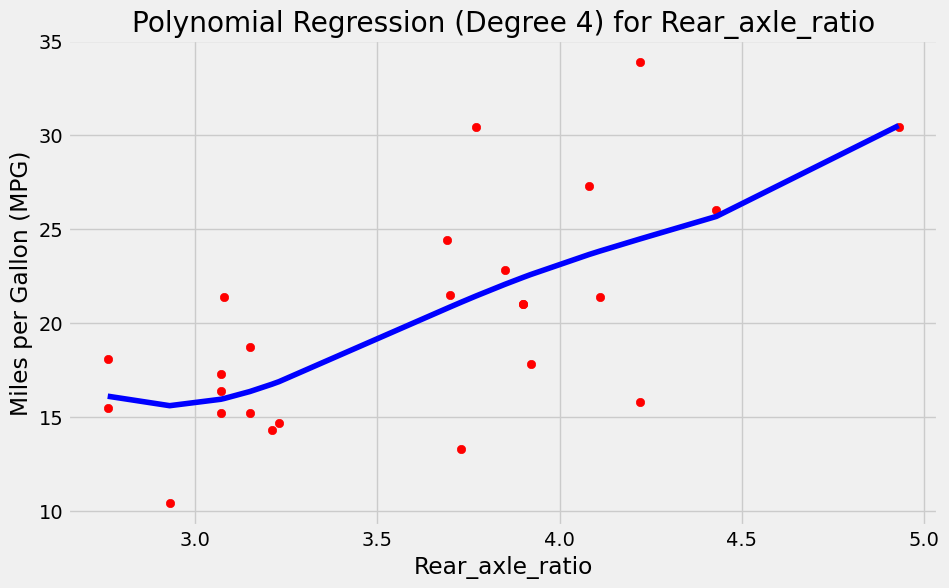

In [173]:
feature = 'rear_axle_ratio'
print(f'\nPolynomial Regression for {feature.capitalize()}:')

X_poly = X[[feature]].values

for degree in [2, 3, 4]:
    print(f'\nDegree {degree} Polynomial Regression for {feature.capitalize()}:')

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train[[feature]])
    X_poly_test = poly.transform(X_test[[feature]])

    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly_train, y_train)

    print(f"Coefficients: {poly_regressor.coef_}")
    print(f"Intercept: {poly_regressor.intercept_}")

    y_pred_poly = poly_regressor.predict(X_poly_test)

    print(f'Polynomial Regression (Degree {degree}) - Variance score (R^2): {poly_regressor.score(X_poly_test, y_test)}')
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_poly))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_poly))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[feature], y_train, color='red')
    plt.plot(np.sort(X_train[feature]), poly_regressor.predict(poly.transform(np.sort(X_train[feature]).reshape(-1, 1))), color='blue')
    plt.title(f'Polynomial Regression (Degree {degree}) for {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Miles per Gallon (MPG)')
    plt.show()



Polynomial Regression for Carburetors :

Degree 2 Polynomial Regression for Carburetors :
Coefficients: [ 0.         -2.54693396 -0.08195755]
Intercept: 27.218985849056597
Polynomial Regression (Degree 2) - Variance score (R^2): -0.4417744801671064
MAE: 6.332109164420504
MSE: 57.6480285108775
RMSE: 7.5926298810673964


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


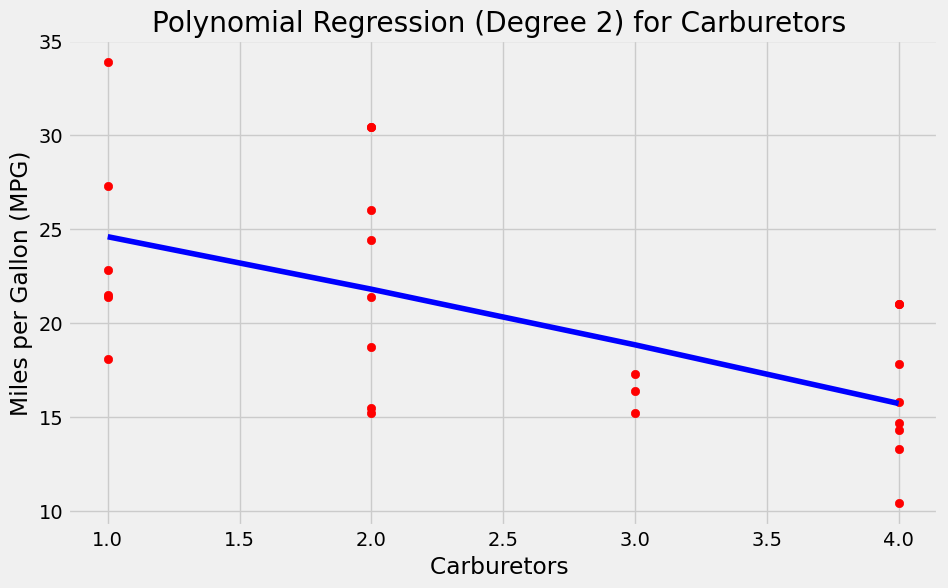


Degree 3 Polynomial Regression for Carburetors :
Coefficients: [  0.          26.70486111 -13.7375       1.87013889]
Intercept: 9.329166666666104
Polynomial Regression (Degree 3) - Variance score (R^2): -304.79843432060767
MAE: 52.31011904762056
MSE: 12227.06956101267
RMSE: 110.57608041982981


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


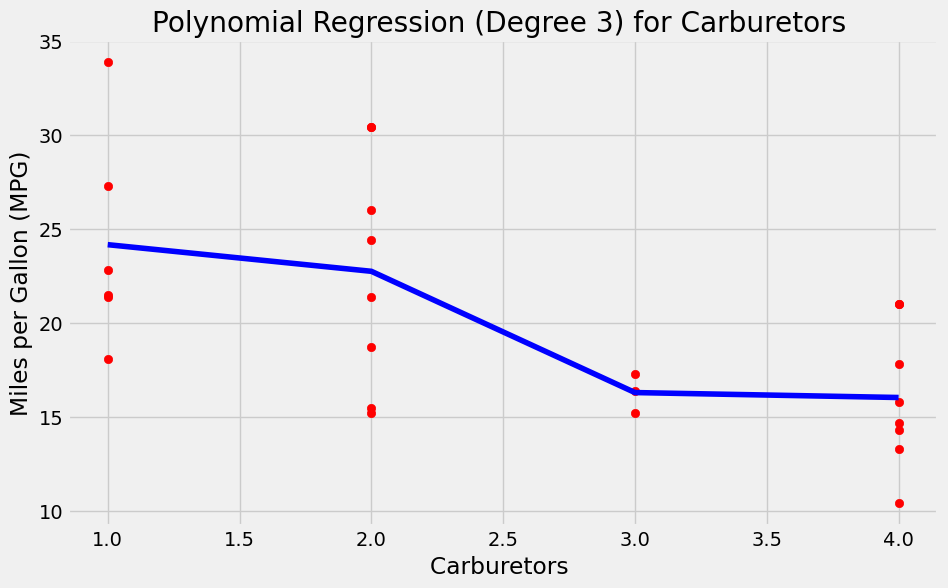


Degree 4 Polynomial Regression for Carburetors :
Coefficients: [ 0.          2.72737883  3.0467376  -2.92535757  0.47954965]
Intercept: 20.83835816344311
Polynomial Regression (Degree 4) - Variance score (R^2): -1744.7855573751458
MAE: 118.07692760062854
MSE: 69803.63223919454
RMSE: 264.2037702970844


C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


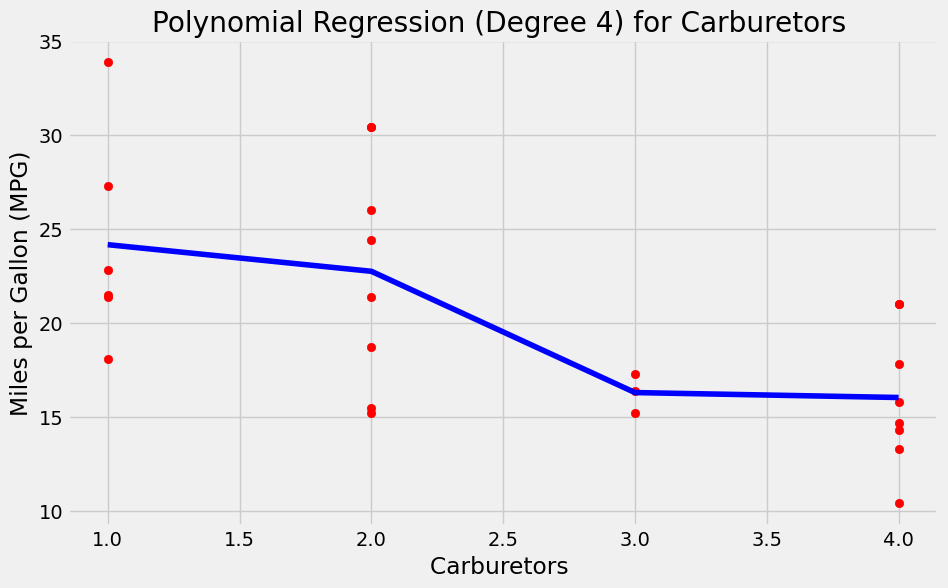

In [174]:
feature = 'carburetors '
print(f'\nPolynomial Regression for {feature.capitalize()}:')

X_poly = X[[feature]].values

for degree in [2, 3, 4]:
    print(f'\nDegree {degree} Polynomial Regression for {feature.capitalize()}:')

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train[[feature]])
    X_poly_test = poly.transform(X_test[[feature]])

    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly_train, y_train)

    print(f"Coefficients: {poly_regressor.coef_}")
    print(f"Intercept: {poly_regressor.intercept_}")

    y_pred_poly = poly_regressor.predict(X_poly_test)

    print(f'Polynomial Regression (Degree {degree}) - Variance score (R^2): {poly_regressor.score(X_poly_test, y_test)}')
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_poly))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_poly))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[feature], y_train, color='red')
    plt.plot(np.sort(X_train[feature]), poly_regressor.predict(poly.transform(np.sort(X_train[feature]).reshape(-1, 1))), color='blue')
    plt.title(f'Polynomial Regression (Degree {degree}) for {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Miles per Gallon (MPG)')
    plt.show()
